------------
# Chess Data Analysis Project
This project performs a basic analysis of a dataset of chess games.
We explore:
1. Game outcomes (who wins: white, black, or draw)
2. Distribution of game lengths (number of moves)
All outputs are saved to the "outputs/" folder for reproducibility.
-------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Ensure outputs folder exists
os.makedirs("outputs", exist_ok=True)
cd = os.getcwd()
print(cd)

/Users/amh/Desktop/Mini_Project


In [3]:
# Load the chess games dataset
data_path = "data/raw/games.csv"
chess_df = pd.read_csv(data_path)
chess_df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


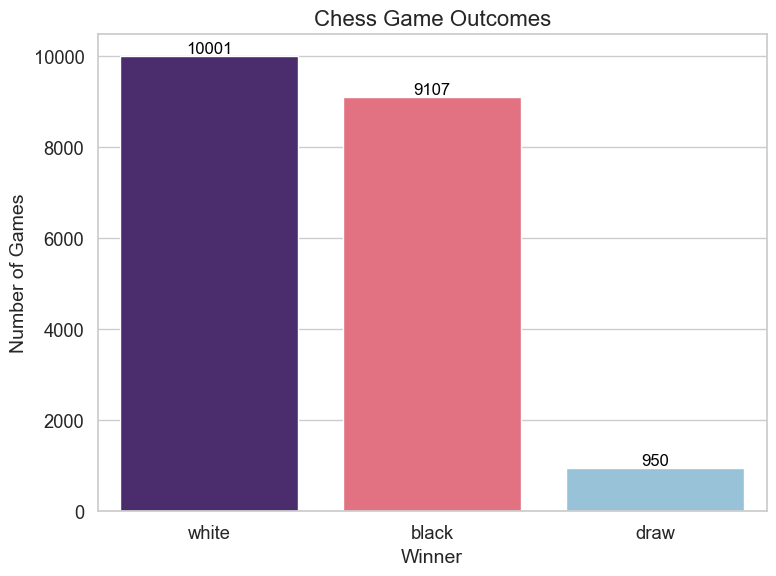

In [4]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

plt.figure(figsize=(8,6))
order = ['white','black','draw']

sns.countplot(
    x='winner', 
    data=chess_df, 
    order=order, 
    hue='winner', 
    palette=['#4a2377','#f55f74','#8cc5e3'], 
    legend=False
)

plt.title("Chess Game Outcomes", fontsize=16)
plt.xlabel("Winner", fontsize=14)
plt.ylabel("Number of Games", fontsize=14)

# Add counts on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.savefig("outputs/game_outcomes.png", dpi=900)
plt.show()

Average moves per game: 60.46599860404826


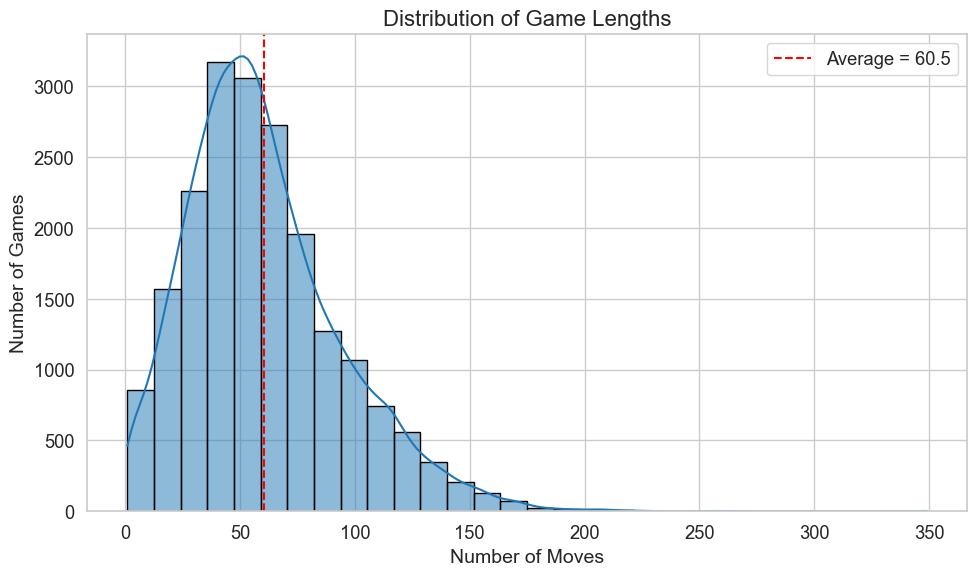

Average moves per game: 60.47


In [ ]:
# -------------------------------
# 2️⃣ Game Length Histogram
# -------------------------------

# Compute number of moves
chess_df['num_moves'] = chess_df['moves'].apply(lambda x: len(str(x).split()))
avg_moves = chess_df['num_moves'].mean()
print(f"Average moves per game: {avg_moves:.2f}")
plt.figure(figsize=(10,6))
sns.histplot(chess_df['num_moves'], bins=30, kde=True, color="#1f77b4", edgecolor='black')
plt.axvline(avg_moves, color='red', linestyle='--', label=f"Average = {avg_moves:.1f}")
plt.title("Distribution of Game Lengths", fontsize=16)
plt.xlabel("Number of Moves", fontsize=14)
plt.ylabel("Number of Games", fontsize=14)
plt.legend()

plt.tight_layout()
plt.savefig("outputs/game_lengths.png", dpi=900)
plt.show()
